In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

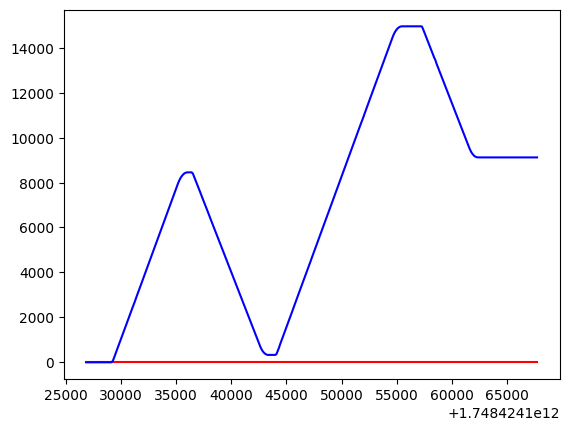

In [20]:
df = pd.read_csv("encoder_12v.csv")

plt.plot(df['time_ms'], df['left_enc'], color='red')
plt.plot(df['time_ms'], df['right_enc'], color='blue')
plt.show()

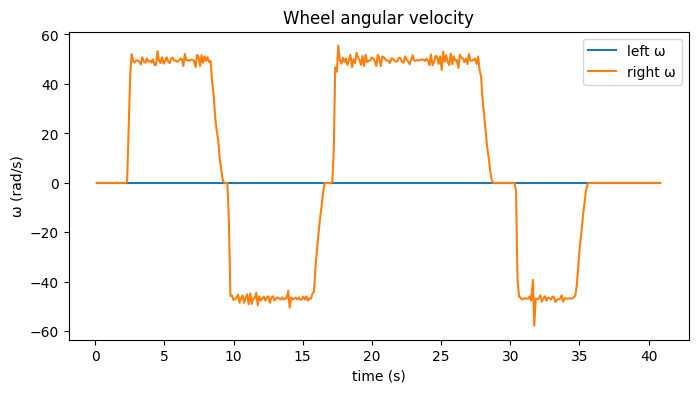

In [21]:
# 170 encoder steps = 1 full revolution
# TODO: calculate radians per sec of each encoder and add to df and plot

df['time_s'] = df['time_ms'] / 1000.0
df['time_s'] = df['time_s'] - df['time_s'].iloc[0]
# finite‐difference of encoder counts and time
df['d_enc_left']  = df['left_enc'].diff()
df['d_enc_right'] = df['right_enc'].diff()
df['dt']          = df['time_s'].diff()

# steps→radians: 170 steps = 2π rad
step2rad = 2 * np.pi / 170.0

# angular velocity in rad/s
df['omega_left']  = (df['d_enc_left']  * step2rad) / df['dt']
df['omega_right'] = (df['d_enc_right'] * step2rad) / df['dt']

# drop the first row (NaNs) or fill if you prefer
df = df.dropna(subset=['omega_left','omega_right'])

# plot
plt.figure(figsize=(8,4))
plt.plot(df['time_s'], df['omega_left'],  label='left ω')
plt.plot(df['time_s'], df['omega_right'], label='right ω')
plt.xlabel('time (s)')
plt.ylabel('ω (rad/s)')
plt.legend()
plt.title('Wheel angular velocity')
plt.show()

In [22]:
np.average(df['omega_right'][30:60])

np.float64(49.53444741888752)